In [11]:
import pandas as pd
import numpy as np 

#### Combine all the tables with the BLBCL-morph dataset

In [12]:
df = pd.read_csv("../original_metadata/DLBCL_clinical_data_cleaned.csv")
headers = pd.read_csv("../original_metadata/DLBCL_column_description (2).csv")

# add headers
headers["Description"]

0     Anonymized and randomized identifier of each p...
1     Results of c-Myc immunohistochemical staining ...
2     Results of BCL2 immunohistochemical staining (...
3     Results of BCL6 immunohistochemical staining (...
4     Results of CD10 immunohistochemical staining (...
5     Results of MUM1 immunohistochemical staining (...
6     Cell of origin prediction based on the Hans al...
7     Results of BCL2 break-apart fluorescence in si...
8     Results of BCL6 break-apart fluorescence in si...
9     Results of MYC break-apart fluorescence in sit...
10    The age (in years) of the patient at the start...
11                              ECOG Performance Status
12    1 if the amount of Lactate Dehydrogenase (LDH)...
13                       The number of extranodal sites
14    Modified Ann Arbor staging system, in which hi...
15    International prognostic index score (Project ...
16    International prognostic index risk group (Int...
17    Revised international prognostic index ris

In [13]:
wsis = pd.read_csv("../original_metadata/DLBCL_files.csv",header=None)
wsis["patient_id"] = wsis[0].str[:5]
df["patient_id"] = df["patient_id"].astype(str)
df_merged = pd.merge( wsis,df, on='patient_id')
df_merged.head()

,0,patient_id,MYC IHC,BCL2 IHC,BCL6 IHC,CD10 IHC,MUM1 IHC,HANS,BCL6 FISH,MYC FISH,...,ECOG PS,LDH,EN,Stage,IPI Score,IPI Risk Group (4 Class),RIPI Risk Group,OS,PFS,Follow-up Status
0,13952_0.svs,13952,30.0,60.0,70.0,1.0,0.0,1.0,0.0,0.0,...,3,1.0,1.0,2.0,3,2.0,2,8.54,0.64,0
1,13952_1.svs,13952,30.0,60.0,70.0,1.0,0.0,1.0,0.0,0.0,...,3,1.0,1.0,2.0,3,2.0,2,8.54,0.64,0
2,13953_0.svs,13953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,2.0,0,0.0,0,9.84,9.84,0
3,13953_1.svs,13953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,2.0,0,0.0,0,9.84,9.84,0
4,13954_0.svs,13954,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,2.0,1,0.0,1,11.13,11.13,0


<AxesSubplot:>

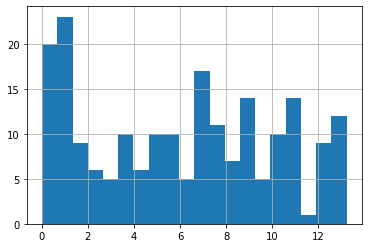

In [14]:
df_merged["PFS"].hist(bins = 20) #split here...

In [15]:
# use just first slide from each patient....

df_merged["slide_id"] = df_merged[0].str[:-4]
df_merged["case_id"] = df_merged["patient_id"]

# Turn this into a binary classification task. 
median = np.median(df_merged['PFS'])
# Binarize the values
df_merged['label'] = np.where(df_merged['PFS'] <= median, 0, 1)

final_df = df_merged[["slide_id","label","case_id"]]
final_df.to_csv("../dataset_csv/DLBCL_6Year_PFS.csv",index=None)